In [2]:
import os
import requests

In [3]:
# Get pdf document path
pdf_path = "human-nutrition-text.pdf"

if not os.path.exists(pdf_path):
  print(f"[INFO] File does not exist. Downloading...")

  # Enter the URL of the pdf.
  url = "https://pressbooks.oer.hawaii.edu/humannutrition2/open/download?type=pdf"

  # The local filename to save the downloaded file
  filename = pdf_path

  # Requests and downloads from the URL of the pdf.
  response = requests.get(url)

  # Check if the request was successful.
  if response.status_code == 200:
    # Open the file and save
    with open(filename, "wb") as file:
      file.write(response.content)
    print(f"[INFO] File just downloaded and saved as {filename}")
  
  else:
    print(f"[INFO] Failed to download the file. Status Code: {response.status_code}")

else:
  print(f"File already exists as {pdf_path}.")

File already exists as human-nutrition-text.pdf.


### We've the pdf. Let's open it.

In [4]:
import pymupdf
from tqdm.auto import tqdm

In [5]:
def text_formatter(text: str) -> str:
  """Performs minor formatting on text"""
  cleaned_text = text.replace("\n", " ").strip()

  "Potentially more text formatting functions can go here"
  return cleaned_text

In [6]:
def open_and_read(pdf_path: str) -> list[dict]:
  doc = pymupdf.open(pdf_path)
  pages_and_texts = []
  for page_number, page in tqdm(enumerate(doc)):
    text = page.get_text()
    text = text_formatter(text=text)
    pages_and_texts.append({"page_number": page_number - 41,
                            "page_char_count": len(text),
                            "page_word_count": len(text.split(" ")),
                            "page_sentence_count_raw": len(text.split(". ")),
                            "page_token_count": len(text) / 4,      # 1 token ~ 4 char
                            "text": text,
                            })
  return pages_and_texts

pages_and_texts = open_and_read(pdf_path=pdf_path)
pages_and_texts[:5]

0it [00:00, ?it/s]

[{'page_number': -41,
  'page_char_count': 29,
  'page_word_count': 4,
  'page_sentence_count_raw': 1,
  'page_token_count': 7.25,
  'text': 'Human Nutrition: 2020 Edition'},
 {'page_number': -40,
  'page_char_count': 0,
  'page_word_count': 1,
  'page_sentence_count_raw': 1,
  'page_token_count': 0.0,
  'text': ''},
 {'page_number': -39,
  'page_char_count': 320,
  'page_word_count': 54,
  'page_sentence_count_raw': 1,
  'page_token_count': 80.0,
  'text': 'Human Nutrition: 2020  Edition  UNIVERSITY OF HAWAI‘I AT MĀNOA  FOOD SCIENCE AND HUMAN  NUTRITION PROGRAM  ALAN TITCHENAL, SKYLAR HARA,  NOEMI ARCEO CAACBAY, WILLIAM  MEINKE-LAU, YA-YUN YANG, MARIE  KAINOA FIALKOWSKI REVILLA,  JENNIFER DRAPER, GEMADY  LANGFELDER, CHERYL GIBBY, CHYNA  NICOLE CHUN, AND ALLISON  CALABRESE'},
 {'page_number': -38,
  'page_char_count': 212,
  'page_word_count': 32,
  'page_sentence_count_raw': 1,
  'page_token_count': 53.0,
  'text': 'Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food 

In [7]:
import random

random.sample(pages_and_texts, k=3)

[{'page_number': 403,
  'page_char_count': 852,
  'page_word_count': 141,
  'page_sentence_count_raw': 5,
  'page_token_count': 213.0,
  'text': 'Learning Activities  Technology Note: The second edition of the Human  Nutrition Open Educational Resource (OER) textbook  features interactive learning activities.\xa0 These activities are  available in the web-based textbook and not available in the  downloadable versions (EPUB, Digital PDF, Print_PDF, or  Open Document).  Learning activities may be used across various mobile  devices, however, for the best user experience it is strongly  recommended that users complete these activities using a  desktop or laptop computer and in Google Chrome.  \xa0 An interactive or media element has been  excluded from this version of the text. You can  view it online here:  http:/ /pressbooks.oer.hawaii.edu/ humannutrition2/?p=268  \xa0 An interactive or media element has been  excluded from this version of the text. You can  Diseases Involving Proteins 

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame(pages_and_texts)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,text
0,-41,29,4,1,7.25,Human Nutrition: 2020 Edition
1,-40,0,1,1,0.00,
2,-39,320,54,1,80.00,Human Nutrition: 2020 Edition UNIVERSITY OF ...
3,-38,212,32,1,53.00,Human Nutrition: 2020 Edition by University of...
4,-37,797,145,2,199.25,Contents Preface University of Hawai‘i at Mā...


In [10]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.59,198.89,9.97,287.15
std,348.86,560.44,95.75,6.19,140.11
min,-41.00,0.00,1.00,1.00,0.00
25%,260.75,762.75,134.00,4.00,190.69
50%,562.50,1232.50,215.00,10.00,308.12
75%,864.25,1605.25,271.25,14.00,401.31
max,1166.00,2308.00,429.00,32.00,577.00


Why would we create about the token count?

Token count is imp because:
1. Embedding model dont deal with infinite tokens
2. LLMs dont deal with infinite tokens.

For Example, an embedding model may have been trained to embed sequences of 384 tokens into numerical space (sentence-transformers `all-mpnet-base-v2`).

As for LLMs, they cant accept infinite tokens in their context-window.

### Further Text processing (splitting pages into sentences)

Two ways to do this:
1. We've done this by splitting on `". "`.
2. We can do this with a NLP library such spacy or NLTK

In [11]:
from spacy.lang.en import English

nlp = English()

# Add a sentencizer pipeline, see "https://spacy.io/api/sentencizer"
nlp.add_pipe("sentencizer")

# Create document instance as an example
doc = nlp("This is a sentence. This is another sentence. I like elephants.")
assert len(list(doc.sents)) == 3

# Print out our sentences split
list(doc.sents)

[This is a sentence., This is another sentence., I like elephants.]

In [12]:
for item in tqdm(pages_and_texts):
  item["sentences"] = list(nlp(item["text"]).sents)

  # make sure all sentences are strings ( the default type is a spaCy datatype )
  item["sentences"] = [str(sentences) for sentences in item["sentences"]]

  # Count the sentences
  item["page_sentence_count_spacy"] = len(item["sentences"])

  0%|          | 0/1208 [00:00<?, ?it/s]

In [13]:
random.sample(pages_and_texts, k=1)

[{'page_number': -28,
  'page_char_count': 1012,
  'page_word_count': 174,
  'page_sentence_count_raw': 2,
  'page_token_count': 253.0,
  'text': 'Factors Affecting Energy Intake  University of Hawai‘i at Mānoa Food Science and  Human Nutrition Program and Human Nutrition  Program  485  Factors Affecting Energy Expenditure  University of Hawai‘i at Mānoa Food Science and  Human Nutrition Program and Human Nutrition  Program  492  Dietary, Behavioral, and Physical Activity  Recommendations for Weight Management  University of Hawai‘i at Mānoa Food Science and  Human Nutrition Program and Human Nutrition  Program  501  Part\xa0IX.\xa0Chapter 9. Vitamins  Introduction  University of Hawai‘i at Mānoa Food Science and  Human Nutrition Program and Human Nutrition  Program  515  Fat-Soluble Vitamins  University of Hawai‘i at Mānoa Food Science and  Human Nutrition Program and Human Nutrition  Program  521  Water-Soluble Vitamins  University of Hawai‘i at Mānoa Food Science and  Human Nutritio

In [14]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.59,198.89,9.97,287.15,10.32
std,348.86,560.44,95.75,6.19,140.11,6.30
min,-41.00,0.00,1.00,1.00,0.00,0.00
25%,260.75,762.75,134.00,4.00,190.69,5.00
50%,562.50,1232.50,215.00,10.00,308.12,10.00
75%,864.25,1605.25,271.25,14.00,401.31,15.00
max,1166.00,2308.00,429.00,32.00,577.00,28.00


### Chunking our sentences together

The concept of splitting larger pieces of text into smaller ones is often referred to as text splitting or chunking.

There is no 100% correct way to do this.

We'll keep it simple and split into groups of 10 sentences  ( however, we can play around with different numbers like 5, 8, 7, etc. )

There are frameworks like langchain which can help with this. Like Langchain.

Why we do this:
1. So our texts are easier to filter ( smaller groups of text can be easier to inspect than large passages of text).
2. So our text chunks can fit into our model context window ( eg 384 tokens as limit)
3. So our contexts passed to an LLM can be more specific and focused.

In [15]:
# Define the split size to turn groups of sentences into chunks
num_sentence_chunk_size = 10

# Create a function to split lists of text recursively into chunk size
# eg [20] -> [10, 10] or [25] -> [10, 10, 5]
def split_list(input_list: list[str],
               slice_size: int=num_sentence_chunk_size) -> list[list[str]]:
  return [input_list[i:i+slice_size] for i in range(0, len(input_list), slice_size)]

test_list = list(range(25))
split_list(test_list)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [16]:
# Loop through pages and texts and split sentences into chunks
for item in tqdm(pages_and_texts):
  item["sentence_chunks"] = split_list(input_list=item["sentences"],
                                       slice_size=num_sentence_chunk_size)
  item["num_chunks"] = len(item["sentence_chunks"])

  0%|          | 0/1208 [00:00<?, ?it/s]

In [17]:
random.sample(pages_and_texts, k=1)

[{'page_number': 827,
  'page_char_count': 1901,
  'page_word_count': 314,
  'page_sentence_count_raw': 19,
  'page_token_count': 475.25,
  'text': 'Components of Breastmilk  Human breast milk not only provides adequate nutrition for infants,  it also helps to protect newborns from disease. In addition, breast  milk is rich in cholesterol, which is needed for brain development. It  is helpful to know the different types and components of breastmilk,  along with the nutrients they provide to enable an infant to survive  and thrive.  Colostrum is the milk produced immediately after birth, prior  to the start of mature milk production, and lasts for two to five  days after the arrival of the baby. Cells in the breast can begin to  secrete colostrum by mid-pregnancy. During the last trimester, the  alveoli (grape-like clusters of cells that produce milk) can become  swollen with colostrum. Colostrum is thicker than mature breast  milk, and is yellowish or creamy in color. This protein-rich

In [18]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.59,198.89,9.97,287.15,10.32,1.53
std,348.86,560.44,95.75,6.19,140.11,6.30,0.64
min,-41.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,260.75,762.75,134.00,4.00,190.69,5.00,1.00
50%,562.50,1232.50,215.00,10.00,308.12,10.00,1.00
75%,864.25,1605.25,271.25,14.00,401.31,15.00,2.00
max,1166.00,2308.00,429.00,32.00,577.00,28.00,3.00


### Splitting each chunk into its own item

We'd like to embed each chunk of sentences into its own numerical representation.

That'll give us a good level of granularity

Meaning, we can dive specifically into the text sample that was used in our model.

In [19]:
import re

# Split each chunk into its own item
pages_and_chunks = []
for item in tqdm(pages_and_texts):
  for sentence_chunk in item["sentence_chunks"]:
    chunk_dict = {}
    chunk_dict["page_number"] = item["page_number"]

    # Join the sentences together into a paragraph like structure, aka join the list of sentences into one paragraph
    joined_sentence_chunk = "".join(sentence_chunk).replace("  ", " ").strip()
    joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk)    # ".A" -> ". A" (will work for any capital letter)

    chunk_dict["sentence_chunk"] = joined_sentence_chunk

    # Get some stats on our chunks
    chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
    chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
    chunk_dict["chunk_token_count"] = len(joined_sentence_chunk) / 4    # 1 token = ~4 chars

    pages_and_chunks.append(chunk_dict)

len(pages_and_chunks)

  0%|          | 0/1208 [00:00<?, ?it/s]

1843

In [20]:
random.sample(pages_and_chunks,k=1)

[{'page_number': 1014,
  'sentence_chunk': 'on food. The FDA analyzes food for surface residue and waxes. Processing methods can either reduce or concentrate pesticide residue in foods. Therefore, the Food Quality Protection Act, which was passed in 1996, requires manufacturers to show that pesticide levels are safe for children. Efforts within the Food Industry The Hazard Analysis Critical Control Points (HACCP) is a program within the food industry designed to promote food safety and prevent contamination by identifying all areas in food production and retail where contamination could occur. Companies and retailers determine the points during processing, packaging, shipping, or shelving where potential contamination may occur.. Those companies or retailers must then establish critical control points to prevent, control, or eliminate the potential for food contamination. The USDA requires the food industry to follow HACCP for meat and poultry, while the FDA requires it for seafood, lo

In [21]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,1843.00,1843.00,1843.00,1843.00
mean,583.38,734.83,112.72,183.71
std,347.79,447.43,71.07,111.86
min,-41.00,12.00,3.00,3.00
25%,280.50,315.00,45.00,78.75
50%,586.00,746.00,114.00,186.50
75%,890.00,1118.50,173.00,279.62
max,1166.00,1831.00,297.00,457.75


In [22]:
df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count
0,-41,Human Nutrition: 2020 Edition,29,4,7.25
1,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00
2,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50
3,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50
4,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25


### Filter chunks of text for short chunks

These chunks may not contain much useful information.

In [23]:
# Show random chunks with under 30 tokens in length
min_token_length = 30
for row in df[df["chunk_token_count"] <= min_token_length].sample(5).iterrows():
  print(f'Chunk token count: {row[1]["chunk_token_count"]} | Text: {row[1]["sentence_chunk"]}')

Chunk token count: 20.75 | Text: http:/ /chl-pacific.org/wp-content/uploads/2011/08/ Novotny-et- Toddler Years | 859
Chunk token count: 25.75 | Text: http:/ /www.ajcn.org/cgi/ pmidlookup?view=long&pmid=10197575. Accessed October 6, 2017. 640 | Magnesium
Chunk token count: 9.75 | Text: 920 | Older Adulthood: The Golden Years
Chunk token count: 7.0 | Text: Water-Soluble Vitamins | 553
Chunk token count: 25.0 | Text: Journal of the American Dietetic Association. 105(6), 929-36. Calories In Versus Calories Out | 1071


In [24]:
# Filter our DataFrame for rows with under 30 tokens
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]

[{'page_number': -39,
  'sentence_chunk': 'Human Nutrition: 2020 Edition UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN NUTRITION PROGRAM ALAN TITCHENAL, SKYLAR HARA, NOEMI ARCEO CAACBAY, WILLIAM MEINKE-LAU, YA-YUN YANG, MARIE KAINOA FIALKOWSKI REVILLA, JENNIFER DRAPER, GEMADY LANGFELDER, CHERYL GIBBY, CHYNA NICOLE CHUN, AND ALLISON CALABRESE',
  'chunk_char_count': 308,
  'chunk_word_count': 42,
  'chunk_token_count': 77.0},
 {'page_number': -38,
  'sentence_chunk': 'Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food Science and Human Nutrition Program is licensed under a Creative Commons Attribution 4.0 International License, except where otherwise noted.',
  'chunk_char_count': 210,
  'chunk_word_count': 30,
  'chunk_token_count': 52.5}]

In [25]:
random.sample(pages_and_chunks_over_min_token_len, k=1)

[{'page_number': 803,
  'sentence_chunk': 'to indulge in the occasional craving, such as the desire for pickles and ice cream. However, a medical disorder known as pica occurs during pregnancy more often than in nonpregnant women. Pica is willingly consuming foods with little or no nutritive value, such as dirt, clay, laundry starch, and large quantities of ice or freezer frost. In some places this is a culturally accepted practice. However, it can be harmful if these substances take the place of nutritious foods or contain toxins. Pica is associated with iron deficiency, sometimes even in the absence of anemia, and iron tends to cure the pica behavior. Complications during Pregnancy Expectant mothers may face different complications during the course of their pregnancy. They include certain medical conditions that could greatly impact a pregnancy if left untreated, such as gestational hypertension and gestational diabetes, which have diet and nutrition implications. Gestational hypert

### Embedding our text chunks

Embeddings are a broad but powerful concept.

We just convert text chunk into numbers, specifically embeddings.

A useful numerical representation.

The best part about embeddings is that are a *learned* representations.

In [26]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device="mps")

# Create a list of sentenes
sentences = ["The Sentence Transformer library provides an easy way to create embeddings.",
             "Sentences can be embedded one by one or in a list.",
             "I like horses!"]

# Sentences are encoded/embedded by calling model.encode()
embeddings = embedding_model.encode(sentences=sentences)
embeddings_dict = dict(zip(sentences, embeddings))

# See the embeddings
for sentence, embedding in embeddings_dict.items():
  print(f"Sentence: {sentence}")
  print(f"Embeddings: {embedding}")
  print("")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Sentence: The Sentence Transformer library provides an easy way to create embeddings.
Embeddings: [-3.44285928e-02  2.95328237e-02 -2.33643465e-02  5.57257161e-02
 -2.19098534e-02 -6.47059409e-03  1.02849556e-02 -6.57804236e-02
  2.29718070e-02 -2.61120927e-02  3.80421430e-02  5.61402626e-02
 -3.68746631e-02  1.52788581e-02  4.37021218e-02 -5.19722812e-02
  4.89479750e-02  3.58107593e-03 -1.29750893e-02  3.54384840e-03
  4.23261598e-02  3.52607071e-02  2.49402020e-02  2.99177244e-02
 -1.99380964e-02 -2.39752401e-02 -3.33370804e-03 -4.30450365e-02
  5.72014116e-02 -1.32517396e-02 -3.54478285e-02 -1.13936244e-02
  5.55561595e-02  3.61098815e-03  8.88527040e-07  1.14026964e-02
 -3.82229798e-02 -2.43551517e-03  1.51314018e-02 -1.32659756e-04
  5.00659458e-02 -5.50876819e-02  1.73444897e-02  5.00958711e-02
 -3.75959687e-02 -1.04463464e-02  5.08322828e-02  1.24861188e-02
  8.67376253e-02  4.64143716e-02 -2.10690107e-02 -3.90251353e-02
  1.99693651e-03 -1.42345708e-02 -1.86795685e-02  2.82669

In [27]:
embeddings[0].shape

(768,)

In [28]:
embedding = embedding_model.encode("My favorite animal is cow")
embedding

array([-1.25506511e-02,  1.01145864e-01, -2.21093893e-02, -2.83085927e-02,
        4.53605391e-02,  4.81229201e-02, -7.22239539e-02,  2.24700999e-02,
        1.35704651e-02, -2.10054219e-02, -5.49110994e-02,  2.55777780e-02,
       -3.06874532e-02,  1.15951532e-02, -1.82581134e-02, -3.86147350e-02,
        2.78753377e-02,  5.27127460e-03,  8.89620557e-03,  3.73114981e-02,
       -1.93244815e-02,  4.57718633e-02, -1.85896158e-02, -2.19033957e-02,
        1.75032430e-04,  1.18406797e-02, -3.71426088e-03, -4.66947220e-02,
        1.77776441e-02,  2.51242407e-02, -4.99838442e-02, -8.48816037e-02,
        1.97409485e-02, -2.90211346e-02,  1.30300452e-06,  3.07746348e-03,
       -2.82752719e-02,  1.07857613e-02,  4.58076671e-02, -1.30570750e-03,
       -2.27463641e-03, -4.72615298e-04, -1.22969262e-02,  9.42769833e-03,
        3.51829594e-03,  4.82065789e-02,  4.58492115e-02,  8.01530108e-03,
       -8.23682845e-02,  2.59114653e-02, -5.11828344e-03, -1.74613409e-02,
       -2.65348069e-02, -

In [29]:
# %%time

# embedding_model.to("cpu")

# # embed each chunk one by one
# for item in tqdm(pages_and_chunks_over_min_token_len):
#   item["embedding"] = embedding_model.encode(item["sentence_chunk"])

In [30]:
%%time

embedding_model.to("mps")

# embed each chunk one by one
for item in tqdm(pages_and_chunks_over_min_token_len):
  item["embedding"] = embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/1680 [00:00<?, ?it/s]

In [ ]:
%%time

text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]
text_chunks[419]

CPU times: user 437 µs, sys: 2.88 ms, total: 3.31 ms
Wall time: 5.87 ms


'often. • Calm your “sweet tooth” by eating fruits, such as berries or an apple. • Replace sugary soft drinks with seltzer water, tea, or a small amount of 100 percent fruit juice added to water or soda water. The Food Industry: Functional Attributes of Carbohydrates and the Use of Sugar Substitutes In the food industry, both fast-releasing and slow-releasing carbohydrates are utilized to give foods a wide spectrum of functional attributes, including increased sweetness, viscosity, bulk, coating ability, solubility, consistency, texture, body, and browning capacity. The differences in chemical structure between the different carbohydrates confer their varied functional uses in foods. Starches, gums, and pectins are used as thickening agents in making jam, cakes, cookies, noodles, canned products, imitation cheeses, and a variety of other foods. Molecular gastronomists use slow- releasing carbohydrates, such as alginate, to give shape and texture to their fascinating food creations. Add

In [ ]:
len(text_chunks)

1680

In [ ]:
import torch

In [ ]:
%%time

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(device)
embedding_model.to(device)
# Embed all the texts in batches
text_chunk_embeddings = embedding_model.encode(text_chunks,
                                              batch_size=32, # you can experiment to find which batch size leads to best results
                                              convert_to_tensor=True,
                                              device=device)

text_chunk_embeddings

mps
CPU times: user 2.55 s, sys: 1.03 s, total: 3.58 s
Wall time: 25 s


tensor([[ 0.0674,  0.0902, -0.0051,  ..., -0.0221, -0.0232,  0.0126],
        [ 0.0552,  0.0592, -0.0166,  ..., -0.0120, -0.0103,  0.0227],
        [ 0.0280,  0.0340, -0.0206,  ..., -0.0054,  0.0213,  0.0313],
        ...,
        [ 0.0771,  0.0098, -0.0122,  ..., -0.0409, -0.0752, -0.0241],
        [ 0.1030, -0.0165,  0.0083,  ..., -0.0574, -0.0283, -0.0295],
        [ 0.0864, -0.0125, -0.0113,  ..., -0.0522, -0.0337, -0.0299]],
       device='mps:0')

### Save embeddings to file

In [ ]:
pages_and_chunks_over_min_token_len[419]

{'page_number': 277,
 'sentence_chunk': 'often. • Calm your “sweet tooth” by eating fruits, such as berries or an apple. • Replace sugary soft drinks with seltzer water, tea, or a small amount of 100 percent fruit juice added to water or soda water. The Food Industry: Functional Attributes of Carbohydrates and the Use of Sugar Substitutes In the food industry, both fast-releasing and slow-releasing carbohydrates are utilized to give foods a wide spectrum of functional attributes, including increased sweetness, viscosity, bulk, coating ability, solubility, consistency, texture, body, and browning capacity. The differences in chemical structure between the different carbohydrates confer their varied functional uses in foods. Starches, gums, and pectins are used as thickening agents in making jam, cakes, cookies, noodles, canned products, imitation cheeses, and a variety of other foods. Molecular gastronomists use slow- releasing carbohydrates, such as alginate, to give shape and texture 

In [ ]:
# Save embeddings to file
text_chunk_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embedding_df_save_path = "text_chunks_and_embeddings_df.csv"
text_chunk_and_embeddings_df.to_csv(embedding_df_save_path, index=False)

In [ ]:
# Import saved file and view
text_chunks_and_embeddings_df_load = pd.read_csv(embedding_df_save_path)
text_chunks_and_embeddings_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00,[ 6.74242601e-02 9.02282000e-02 -5.09550748e-...
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50,[ 5.52156121e-02 5.92139475e-02 -1.66167151e-...
2,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50,[ 2.79801954e-02 3.39814164e-02 -2.06426531e-...
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25,[ 6.82566687e-02 3.81274968e-02 -8.46853480e-...
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50,[ 3.30264531e-02 -8.49766191e-03 9.57159698e-...


If your embedding database is very large (e.g. over 100k-1M samples) you might want to look into using vector databases.

### RAG - Search and Answer

RAG goal: Retrieve relevant passages based on a query and use those passages to augment an input to an LLM so it can generate an output based on those relevant passages.

### Similarity search

Embeddings can be used for almost any type of data.

For example, you can turn images into embeddings, sound into embeddings, text into embeddings, etc...

Comparing embeddings is known as similarity search, vector search, semantic search.

In our case, we want to query our nutrition textbook passages based on semantics or *vibe*.

So if I search for "macronutrients functions" I should get relevant passsages to that text, but may not contain exactly the words "macronutrient functions"

Whereas with keyword search, if I search "apple", I get back passages with specifically "apple".

In [ ]:
import random
import torch
import numpy as np
import pandas as pd

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Import texts and embedding DataFrame
text_chunk_and_embeddings_df = pd.read_csv("text_chunks_and_embeddings_df.csv")

# Convert embedding column back to np.array (it got converted to string when it saved to CSV)
text_chunk_and_embeddings_df["embedding"] = text_chunk_and_embeddings_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

# Ensure embeddings are float32 before creating torch tensor
embeddings_np = np.stack(text_chunk_and_embeddings_df["embedding"].tolist(), axis=0).astype(np.float32)

# Convert our embeddings into a torch.tensor
embeddings = torch.tensor(embeddings_np).to(device)

# Convert the texts and embeddings DataFrame to list of dicts
pages_and_chunks = text_chunk_and_embeddings_df.to_dict(orient="records")

text_chunk_and_embeddings_df


,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00,"[0.0674242601, 0.0902282, -0.00509550748, -0.0..."
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50,"[0.0552156121, 0.0592139475, -0.0166167151, -0..."
2,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50,"[0.0279801954, 0.0339814164, -0.0206426531, 0...."
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25,"[0.0682566687, 0.0381274968, -0.0084685348, -0..."
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50,"[0.0330264531, -0.00849766191, 0.00957159698, ..."
...,...,...,...,...,...,...
1675,1164,Flashcard Images Note: Most images in the flas...,1305,176,326.25,"[0.0185622405, -0.0164277516, -0.0127045689, -..."
1676,1164,Hazard Analysis Critical Control Points reused...,375,51,93.75,"[0.0334721021, -0.0570440702, 0.0151489517, -0..."
1677,1165,ShareAlike 11. Organs reused “Pancreas Organ A...,1286,173,321.50,"[0.0770514905, 0.00978555996, -0.0121817114, 0..."
1678,1165,Sucrose reused “Figure 03 02 05” by OpenStax B...,410,59,102.50,"[0.103045128, -0.0164701939, 0.0082684895, 0.0..."


In [ ]:
embeddings.shape

torch.Size([1680, 768])

In [ ]:
# Create model
from sentence_transformers import util, SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device=device)

Embedding Model Ready!

Let's create a small semantic search pipeline.

In essence, we want to search for a query (e.g. "macronutrient functions") and get back relevant passages from our textbook.

We can do so with the following steps:
1. Define a query string
2. Turn the query string into and embedding.
3. Perform a dot product or cosine similarity function between the text embeddings and the query embedding.
4. Sort the results from 3 in descending order

In [ ]:
embeddings.shape

torch.Size([1680, 768])

Note: To use dot product for comparison, ensure vector sizes are same shape (e.g. 768) and tensors/vectors are in the same datatype (e.g. float32)

In [ ]:
# 1. Define the query
query = "macronutrient functions"
print(f"Query: {query}")

# 2. Embed the query
# Note: it's important to embed your query with the same model you embed your passages.
query_embedding = embedding_model.encode(query, convert_to_tensor=True).to(device)

# 3. Get similarity scores with the dot product (use cosine similarity if outputs of model aren't normalized)
from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=embeddings)[0]
end_time = timer()

print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time - start_time:.5f} seconds.")

# 4. Get the top-k results (we'll keep to top 5)
top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product

Query: macronutrient functions
[INFO] Time taken to get scores on 1680 embeddings: 0.00035 seconds.


torch.return_types.topk(
values=tensor([0.6843, 0.6717, 0.6517, 0.6493, 0.6478], device='mps:0'),
indices=tensor([42, 47, 46, 51, 41], device='mps:0'))

In [ ]:
larger_embeddings = torch.randn(100*embeddings.shape[0], 768).to(device)
print(f"Embeddings shape: {larger_embeddings.shape}")

# Perform dot product across 1,680,,000 embeddings
start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=larger_embeddings)[0]
end_time = timer()

print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time - start_time:.5f} seconds.")

Embeddings shape: torch.Size([1680000, 768])
[INFO] Time taken to get scores on 1680 embeddings: 0.08644 seconds.


We can see that searching over embeddings is very fast even if we do exhaustive.

But if you had 10M+ embeddings, you likely want to create an index.

An index is like letters is the dictionary.

For example, if you wanted to search "duck" in the dictionary, you'd start at "d" then find words close to "du.." etc.

So index helps to narrow it down.

A popular indexing library for vector search is Faiss.

One technique that the library provides is approximate nearest neighbor search (ANN).

Let's make our vector search results pretty

In [ ]:
import textwrap

def print_wrapped(text, wrap_length=80):
  wrapped_text = textwrap.fill(text, wrap_length)
  print(wrapped_text)

In [ ]:
query = "macronutrient functions"
print(f"Query: '{query}'\n")
print("Results:")

# Loop through zipped together scores and indices from torch.topk
for score, idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
  print(f"Score: {score:.4f}")
  print("Text:")
  print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
  print(f"Page Number: {pages_and_chunks[idx]['page_number']}")
  print("\n")

Query: 'macronutrient functions'

Results:
Score: 0.6843
Text:
Macronutrients Nutrients that are needed in large amounts are called
macronutrients. There are three classes of macronutrients: carbohydrates,
lipids, and proteins. These can be metabolically processed into cellular energy.
The energy from macronutrients comes from their chemical bonds. This chemical
energy is converted into cellular energy that is then utilized to perform work,
allowing our bodies to conduct their basic functions. A unit of measurement of
food energy is the calorie. On nutrition food labels the amount given for
“calories” is actually equivalent to each calorie multiplied by one thousand. A
kilocalorie (one thousand calories, denoted with a small “c”) is synonymous with
the “Calorie” (with a capital “C”) on nutrition food labels. Water is also a
macronutrient in the sense that you require a large amount of it, but unlike the
other macronutrients, it does not yield calories. Carbohydrates Carbohydrates
are m

Note: We could potentially improve the order of these results with a reranking model. A model that has been trained specifically to take search results (e.g. the top 25 semantic results) and rank them in order from most likely top-1 to least likely.

See here for an open source reranking model: https://huggingface.co/mixedbread-ai/mxbai-rerank-large-v1

To check our results, what if we wanted to automatically surface the page of text related to our query?

Text(0.5, 1.0, "Query: 'macronutrient functions' | Most Relevant Page:")

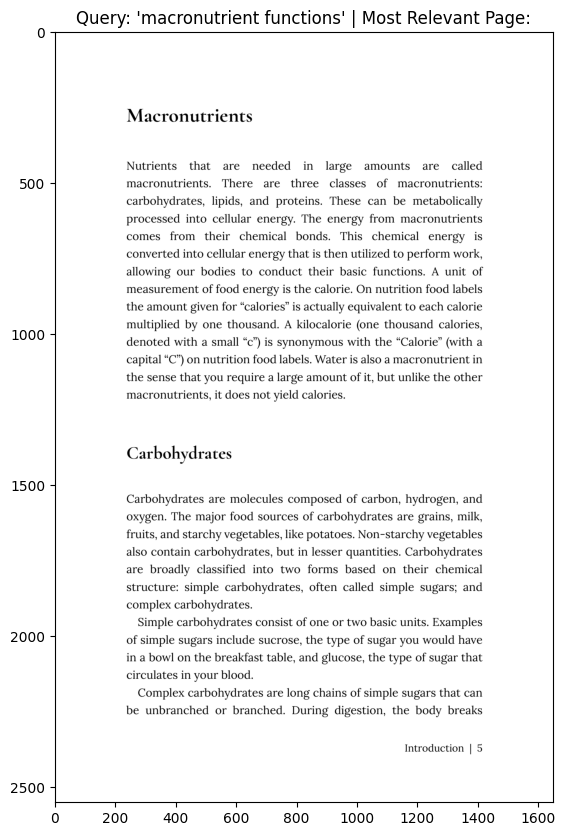

In [ ]:
import fitz # pymupdf library

# open PDF and load target page number
pdf_path = "human-nutrition-text.pdf"
doc = fitz.open(pdf_path)
page = doc.load_page(5 + 41) # note: page numbers of our PDF start 41+

# Get the image of the page
img = page.get_pixmap(dpi=300)

# Save image (optional)
# img.save("output_filename.png")
doc.close()

# Convert the pixmap to a numpy array
img_array = np.frombuffer(img.samples_mv,
                          dtype=np.uint8).reshape((img.h, img.w, img.n))


# Display the image using Matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | Most Relevant Page:")



### Similarity measures: dot product and cosine similarity

Two of the most common similarity measures between vectors are dot product and cosine similarity.

In essence, closer vectors will have higher scores, further away vectors will have lower scores.

Vectors have direction (which way is it going?) and magnitude (how long is it?)

In [ ]:
def dot_product(vector1, vector2):
  return torch.dot(vector1, vector2)

def cosine_similarity(vector1, vector2):
  dot_product = torch.dot(vector1, vector2)

  # Get Euclidean/L2 norm
  norm_vector1 = torch.sqrt(torch.sum(vector1**2))
  norm_vector2 = torch.sqrt(torch.sum(vector2**2))

  return dot_product / (norm_vector1 * norm_vector2)

# Example vectors/tensors
vector1 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector2 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector3 = torch.tensor([4, 5, 6], dtype=torch.float32)
vector4 = torch.tensor([-1, -2, -3], dtype=torch.float32)

# Calculate dot product
print(f"Dot Product between vector1 and vector2: {dot_product(vector1, vector2):.4f}")
print(f"Dot Product between vector1 and vector3: {dot_product(vector1, vector3):.4f}")
print(f"Dot Product between vector1 and vector3: {dot_product(vector1, vector4):.4f}")

# Cosine Similarity
print("")
print(f"Cosine Similarity between vector1 and vector2: {cosine_similarity(vector1, vector2):.4f}")
print(f"Cosine Similarity between vector1 and vector3: {cosine_similarity(vector1, vector3):.4f}")
print(f"Cosine Similarity between vector1 and vector4: {cosine_similarity(vector1, vector4):.4f}")

Dot Product between vector1 and vector2: 14.0000
Dot Product between vector1 and vector3: 32.0000
Dot Product between vector1 and vector3: -14.0000

Cosine Similarity between vector1 and vector2: 1.0000
Cosine Similarity between vector1 and vector3: 0.9746
Cosine Similarity between vector1 and vector4: -1.0000


### Functionizing our semantic search pipeline

Let's put all of the steps from above for semantic search into a function or two so that we can repeat the workflow.

In [ ]:
def retrieve_relevant_resources(query: str,
                                embeddings: torch.tensor,
                                model: SentenceTransformer=embedding_model,
                                n_resources_to_return: int=5,
                                print_time: bool=True):
  """
  Embed a query with model and returns top k socres and indices from embeddings
  """

  # Embed the query
  query_embedding = model.encode(query, convert_to_tensor=True)

  # Get the dot product scores on embeddings
  start_time = timer()
  dot_scores = util.dot_score(query_embedding, embeddings)[0]
  end_time = timer()

  if print_time:
    print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time - start_time:.5f} seconds")

  scores, indices = torch.topk(input=dot_scores,
                               k=n_resources_to_return)
  
  return scores, indices

NameError: name 'embedding_model' is not defined

In [ ]:
def print_top_results_and_scores(query: str,
                                 embeddings: torch.tensor,
                                 pages_and_chunks: list[dict]=pages_and_chunks,
                                 n_resources_to_return: int=5):
  
  """
  Finds relevant passages given a query and prints them out along with their scores.
  """

  scores, indices = retrieve_relevant_resources(query=query,
                                                embeddings=embeddings,
                                                n_resources_to_return=n_resources_to_return)
  
  # Loop through zipped together scores and indices from torch.topk
  for score, idx in zip(scores, indices):
    print(f"Score: {score:.4f}")
    print("Text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    print(f"Page Number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

In [ ]:
query="foods high in fiber"
print_top_results_and_scores(query=query, embeddings=embeddings)

[INFO] Time taken to get scores on 1680 embeddings: 0.00138 seconds
Score: 0.6964
Text:
• Change it up a bit and experience the taste and satisfaction of other whole
grains such as barley, quinoa, and bulgur. • Eat snacks high in fiber, such as
almonds, pistachios, raisins, and air-popped popcorn. Add an artichoke and green
peas to your dinner plate more 276 | Carbohydrates and Personal Diet Choices
Page Number: 276


Score: 0.6810
Text:
Dietary fiber is categorized as either water-soluble or insoluble. Some examples
of soluble fibers are inulin, pectin, and guar gum and they are found in peas,
beans, oats, barley, and rye. Cellulose and lignin are insoluble fibers and a
few dietary sources of them are whole-grain foods, flax, cauliflower, and
avocados. Cellulose is the most abundant fiber in plants, making up the cell
walls and providing structure. Soluble fibers are more easily accessible to
bacterial enzymes in the large intestine so they can be broken down to a greater
extent than 

### Getting an LLM for local generatinon

We want to focus on local generation.

However, this process will also work with an LLM API.

What is a generative LLM?

Goes from text input to generate -> generate text output.

Which LLM should I use?

* How much hardware VRAM do you have available?

### Checking our local GPU memory availability.

In [ ]:
# mps_device = torch.device("mps")
# mps_memory_bytes = torch.cuda.get_device_properties(mps_device.index).total_memory
# mps_memory_gb = round(mps_memory_bytes / (2**30))
# print(f"Available MPS memory: {mps_memory_gb} GB")

In [ ]:
gpu_memory_gb = torch.mps.current_allocated_memory() / (2**30)
print(f"Available MPS memory: {gpu_memory_gb} GB")

Available MPS memory: 5.255575656890869 GB


Notes: 
* to use `gemma-7b-it` or other Gemma models, you have to accept terms and conditions on hugging face.

In [ ]:
# Note: the following is Gemma focused, however, there are more and more LLMs of the 2B and 7B size appearing for local use.
if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb}GB, you may not have enough memory to run a Gemma LLM locally without quantization.")
elif gpu_memory_gb < 8.1:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in 4-bit precision.")
    use_quantization_config = True 
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb < 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.")
    use_quantization_config = False 
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb > 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommend model: Gemma 7B in 4-bit or float16 precision.")
    use_quantization_config = False 
    model_id = "google/gemma-7b-it"

print(f"use_quantization_config set to: {use_quantization_config}")
print(f"model_id set to: {model_id}")

GPU memory: 5.255575656890869 | Recommended model: Gemma 2B in 4-bit precision.
use_quantization_config set to: True
model_id set to: google/gemma-1.1-2b-it


### Loading an LLM locally

We can load an LLM locally using huggingface `transformers`.

Choose the model accordingly.

To get a model running locally. We need a few things:
1. A quantization config (optional) - a config on what precision to load the model in (e.g. 8bit, 4bit, etc.)
2. A model ID - this will tell transformers which model/tokenizer to load
3. A tokenizer - this turns text into numbers ready for the LLM (note: a tokenizer is different from an embedding model)
4. An LLM model - this will be what we use to generate text based on an input!

> **Note:** There are many tips and tricks on loading/making LLMs work faster. One of the best ones is flash_attn (Flash Attention 2). See the GitHub for more.

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# 1. Create a quantization config
# Note: requires !pip install bitsandbytes accelerate
from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)
# Bonus: flash attention 2 = faster attention mechanism
# Flash Attention 2 requires a GPU with a compute capability score of 8.0+ (Ampere, Ada Lovelace, Hopper and above)
attn_implementation = "sdpa"    # scaled dot product attention

# 2. Pick a model we'd like to use
model_id = model_id

# 3. Instantiate Tokenizer (Tokenizer turns text into tokens)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

# 4. Instantiate the model
llm_model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=model_id,
                                                 torch_dtype=torch.float16,
                                                 quantization_config=quantization_config if use_quantization_config else None,
                                                 low_cpu_mem_usage=False, # use as much memory as we can
                                                 attn_implementation=attn_implementation)

if not use_quantization_config:
  llm_model.to(device)

ValueError: Tokenizer class GemmaTokenizer does not exist or is not currently imported.